## 4(3) LGBM&CAT
221103일 학습시킨 모델의 코드이다. 최종적으로 LGBM을 택했으며 3.2693982693이 나왔다.
- target encoding으로 과적합이 된 것 같다.

### Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ; warnings.filterwarnings('ignore')

### Read Data

In [2]:
train = pd.read_csv('../data/feature/20221103_train_2.csv', dtype={'maximum_speed_limit':int, 'weight_restricted':int})
test = pd.read_csv('../data/feature/20221103_test_2.csv', dtype={'maximum_speed_limit':int, 'weight_restricted':int})

In [3]:
# Feature가 아닌 변수를 제거한다.
train_id, test_id = train['id'], test['id'] ; del train['id'], test['id']

# X_train, y_train, X_test를 지정한다
y_train = train['target'] ; del train['target']
X_train, X_test = train, test
print('X_train.shape:', X_train.shape, 'X_test.shape', X_test.shape)

X_train.shape: (4701217, 49) X_test.shape (291241, 49)


### Split Data

In [4]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, shuffle=False, random_state=2022)

### $\blacktriangleright$ LGBM

In [5]:
lgbm_reg = LGBMRegressor(n_estimators=10000, metric= 'mae', random_state = 2022)

In [6]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'mae', 
            "eval_set" : [(val_X, val_y)],
            'verbose': 1,
            'categorical_feature': ['day_of_week', 'connect_code', 'maximum_speed_limit',
                                    'weight_restricted', 'road_type', 'start_turn_restricted', 'end_turn_restricted']}

In [7]:
lgbm_reg.fit(train_X, train_y, **fit_params)

[1]	valid_0's l1: 12.0953
[2]	valid_0's l1: 11.0782
[3]	valid_0's l1: 10.1811
[4]	valid_0's l1: 9.38984
[5]	valid_0's l1: 8.68801
[6]	valid_0's l1: 8.07129
[7]	valid_0's l1: 7.53279
[8]	valid_0's l1: 7.05458
[9]	valid_0's l1: 6.64136
[10]	valid_0's l1: 6.28123
[11]	valid_0's l1: 5.96884
[12]	valid_0's l1: 5.70155
[13]	valid_0's l1: 5.46734
[14]	valid_0's l1: 5.26623
[15]	valid_0's l1: 5.09322
[16]	valid_0's l1: 4.94668
[17]	valid_0's l1: 4.82003
[18]	valid_0's l1: 4.7098
[19]	valid_0's l1: 4.6164
[20]	valid_0's l1: 4.53523
[21]	valid_0's l1: 4.46569
[22]	valid_0's l1: 4.4066
[23]	valid_0's l1: 4.35566
[24]	valid_0's l1: 4.31178
[25]	valid_0's l1: 4.27326
[26]	valid_0's l1: 4.23876
[27]	valid_0's l1: 4.21018
[28]	valid_0's l1: 4.18319
[29]	valid_0's l1: 4.15938
[30]	valid_0's l1: 4.13947
[31]	valid_0's l1: 4.1193
[32]	valid_0's l1: 4.10353
[33]	valid_0's l1: 4.08822
[34]	valid_0's l1: 4.07387
[35]	valid_0's l1: 4.06146
[36]	valid_0's l1: 4.05126
[37]	valid_0's l1: 4.04047
[38]	valid_0's

[301]	valid_0's l1: 3.55786
[302]	valid_0's l1: 3.55765
[303]	valid_0's l1: 3.55735
[304]	valid_0's l1: 3.55628
[305]	valid_0's l1: 3.55545
[306]	valid_0's l1: 3.55474
[307]	valid_0's l1: 3.55316
[308]	valid_0's l1: 3.55114
[309]	valid_0's l1: 3.55019
[310]	valid_0's l1: 3.54935
[311]	valid_0's l1: 3.54807
[312]	valid_0's l1: 3.54713
[313]	valid_0's l1: 3.54704
[314]	valid_0's l1: 3.54596
[315]	valid_0's l1: 3.54515
[316]	valid_0's l1: 3.544
[317]	valid_0's l1: 3.54182
[318]	valid_0's l1: 3.54035
[319]	valid_0's l1: 3.53867
[320]	valid_0's l1: 3.53771
[321]	valid_0's l1: 3.53693
[322]	valid_0's l1: 3.53596
[323]	valid_0's l1: 3.53392
[324]	valid_0's l1: 3.53321
[325]	valid_0's l1: 3.53282
[326]	valid_0's l1: 3.53171
[327]	valid_0's l1: 3.53033
[328]	valid_0's l1: 3.52838
[329]	valid_0's l1: 3.52738
[330]	valid_0's l1: 3.52703
[331]	valid_0's l1: 3.52567
[332]	valid_0's l1: 3.52488
[333]	valid_0's l1: 3.52394
[334]	valid_0's l1: 3.52284
[335]	valid_0's l1: 3.52255
[336]	valid_0's l1: 3.

[597]	valid_0's l1: 3.37488
[598]	valid_0's l1: 3.37434
[599]	valid_0's l1: 3.37392
[600]	valid_0's l1: 3.37384
[601]	valid_0's l1: 3.37302
[602]	valid_0's l1: 3.37269
[603]	valid_0's l1: 3.37224
[604]	valid_0's l1: 3.37197
[605]	valid_0's l1: 3.37187
[606]	valid_0's l1: 3.37162
[607]	valid_0's l1: 3.3713
[608]	valid_0's l1: 3.37086
[609]	valid_0's l1: 3.37081
[610]	valid_0's l1: 3.37058
[611]	valid_0's l1: 3.37016
[612]	valid_0's l1: 3.36978
[613]	valid_0's l1: 3.36953
[614]	valid_0's l1: 3.36925
[615]	valid_0's l1: 3.3689
[616]	valid_0's l1: 3.36835
[617]	valid_0's l1: 3.36807
[618]	valid_0's l1: 3.36779
[619]	valid_0's l1: 3.36738
[620]	valid_0's l1: 3.36702
[621]	valid_0's l1: 3.36637
[622]	valid_0's l1: 3.36627
[623]	valid_0's l1: 3.36603
[624]	valid_0's l1: 3.36579
[625]	valid_0's l1: 3.36535
[626]	valid_0's l1: 3.36514
[627]	valid_0's l1: 3.36443
[628]	valid_0's l1: 3.36413
[629]	valid_0's l1: 3.36331
[630]	valid_0's l1: 3.36298
[631]	valid_0's l1: 3.3628
[632]	valid_0's l1: 3.3

[893]	valid_0's l1: 3.28104
[894]	valid_0's l1: 3.28086
[895]	valid_0's l1: 3.28054
[896]	valid_0's l1: 3.27992
[897]	valid_0's l1: 3.27978
[898]	valid_0's l1: 3.27957
[899]	valid_0's l1: 3.27901
[900]	valid_0's l1: 3.27889
[901]	valid_0's l1: 3.27867
[902]	valid_0's l1: 3.27851
[903]	valid_0's l1: 3.2784
[904]	valid_0's l1: 3.27818
[905]	valid_0's l1: 3.27804
[906]	valid_0's l1: 3.27779
[907]	valid_0's l1: 3.27754
[908]	valid_0's l1: 3.277
[909]	valid_0's l1: 3.27676
[910]	valid_0's l1: 3.27608
[911]	valid_0's l1: 3.27587
[912]	valid_0's l1: 3.27574
[913]	valid_0's l1: 3.27542
[914]	valid_0's l1: 3.27497
[915]	valid_0's l1: 3.27481
[916]	valid_0's l1: 3.27424
[917]	valid_0's l1: 3.27402
[918]	valid_0's l1: 3.27373
[919]	valid_0's l1: 3.27356
[920]	valid_0's l1: 3.27334
[921]	valid_0's l1: 3.27322
[922]	valid_0's l1: 3.27284
[923]	valid_0's l1: 3.27274
[924]	valid_0's l1: 3.2727
[925]	valid_0's l1: 3.27247
[926]	valid_0's l1: 3.27228
[927]	valid_0's l1: 3.27198
[928]	valid_0's l1: 3.27

[1181]	valid_0's l1: 3.21931
[1182]	valid_0's l1: 3.21917
[1183]	valid_0's l1: 3.21897
[1184]	valid_0's l1: 3.21895
[1185]	valid_0's l1: 3.21892
[1186]	valid_0's l1: 3.21882
[1187]	valid_0's l1: 3.21872
[1188]	valid_0's l1: 3.21856
[1189]	valid_0's l1: 3.21856
[1190]	valid_0's l1: 3.21843
[1191]	valid_0's l1: 3.21836
[1192]	valid_0's l1: 3.2183
[1193]	valid_0's l1: 3.21825
[1194]	valid_0's l1: 3.21806
[1195]	valid_0's l1: 3.21806
[1196]	valid_0's l1: 3.2178
[1197]	valid_0's l1: 3.21773
[1198]	valid_0's l1: 3.21765
[1199]	valid_0's l1: 3.21754
[1200]	valid_0's l1: 3.21741
[1201]	valid_0's l1: 3.21727
[1202]	valid_0's l1: 3.2172
[1203]	valid_0's l1: 3.21701
[1204]	valid_0's l1: 3.21673
[1205]	valid_0's l1: 3.21651
[1206]	valid_0's l1: 3.21646
[1207]	valid_0's l1: 3.21641
[1208]	valid_0's l1: 3.21624
[1209]	valid_0's l1: 3.21607
[1210]	valid_0's l1: 3.21577
[1211]	valid_0's l1: 3.21544
[1212]	valid_0's l1: 3.21531
[1213]	valid_0's l1: 3.21527
[1214]	valid_0's l1: 3.21525
[1215]	valid_0's 

[1471]	valid_0's l1: 3.178
[1472]	valid_0's l1: 3.17792
[1473]	valid_0's l1: 3.1779
[1474]	valid_0's l1: 3.17782
[1475]	valid_0's l1: 3.17768
[1476]	valid_0's l1: 3.17761
[1477]	valid_0's l1: 3.17751
[1478]	valid_0's l1: 3.17725
[1479]	valid_0's l1: 3.17714
[1480]	valid_0's l1: 3.1771
[1481]	valid_0's l1: 3.1768
[1482]	valid_0's l1: 3.17672
[1483]	valid_0's l1: 3.17659
[1484]	valid_0's l1: 3.17629
[1485]	valid_0's l1: 3.17618
[1486]	valid_0's l1: 3.17614
[1487]	valid_0's l1: 3.17609
[1488]	valid_0's l1: 3.17571
[1489]	valid_0's l1: 3.17563
[1490]	valid_0's l1: 3.1755
[1491]	valid_0's l1: 3.17533
[1492]	valid_0's l1: 3.17524
[1493]	valid_0's l1: 3.17517
[1494]	valid_0's l1: 3.17507
[1495]	valid_0's l1: 3.17497
[1496]	valid_0's l1: 3.17486
[1497]	valid_0's l1: 3.17477
[1498]	valid_0's l1: 3.17453
[1499]	valid_0's l1: 3.17439
[1500]	valid_0's l1: 3.17428
[1501]	valid_0's l1: 3.17407
[1502]	valid_0's l1: 3.17385
[1503]	valid_0's l1: 3.17374
[1504]	valid_0's l1: 3.17362
[1505]	valid_0's l1:

[1755]	valid_0's l1: 3.15113
[1756]	valid_0's l1: 3.15089
[1757]	valid_0's l1: 3.15066
[1758]	valid_0's l1: 3.15042
[1759]	valid_0's l1: 3.15029
[1760]	valid_0's l1: 3.15024
[1761]	valid_0's l1: 3.15012
[1762]	valid_0's l1: 3.15001
[1763]	valid_0's l1: 3.14999
[1764]	valid_0's l1: 3.14986
[1765]	valid_0's l1: 3.14979
[1766]	valid_0's l1: 3.14972
[1767]	valid_0's l1: 3.14968
[1768]	valid_0's l1: 3.1496
[1769]	valid_0's l1: 3.14938
[1770]	valid_0's l1: 3.14932
[1771]	valid_0's l1: 3.14927
[1772]	valid_0's l1: 3.14916
[1773]	valid_0's l1: 3.14903
[1774]	valid_0's l1: 3.14895
[1775]	valid_0's l1: 3.1487
[1776]	valid_0's l1: 3.14852
[1777]	valid_0's l1: 3.1485
[1778]	valid_0's l1: 3.14837
[1779]	valid_0's l1: 3.14812
[1780]	valid_0's l1: 3.14805
[1781]	valid_0's l1: 3.1479
[1782]	valid_0's l1: 3.14763
[1783]	valid_0's l1: 3.14755
[1784]	valid_0's l1: 3.14752
[1785]	valid_0's l1: 3.14747
[1786]	valid_0's l1: 3.14722
[1787]	valid_0's l1: 3.14719
[1788]	valid_0's l1: 3.14712
[1789]	valid_0's l

[2041]	valid_0's l1: 3.12784
[2042]	valid_0's l1: 3.12783
[2043]	valid_0's l1: 3.12776
[2044]	valid_0's l1: 3.12771
[2045]	valid_0's l1: 3.12766
[2046]	valid_0's l1: 3.12764
[2047]	valid_0's l1: 3.12755
[2048]	valid_0's l1: 3.12737
[2049]	valid_0's l1: 3.12736
[2050]	valid_0's l1: 3.12733
[2051]	valid_0's l1: 3.1273
[2052]	valid_0's l1: 3.12727
[2053]	valid_0's l1: 3.12726
[2054]	valid_0's l1: 3.12725
[2055]	valid_0's l1: 3.12724
[2056]	valid_0's l1: 3.12724
[2057]	valid_0's l1: 3.1272
[2058]	valid_0's l1: 3.12713
[2059]	valid_0's l1: 3.12692
[2060]	valid_0's l1: 3.12691
[2061]	valid_0's l1: 3.12666
[2062]	valid_0's l1: 3.12648
[2063]	valid_0's l1: 3.12644
[2064]	valid_0's l1: 3.12641
[2065]	valid_0's l1: 3.12637
[2066]	valid_0's l1: 3.12629
[2067]	valid_0's l1: 3.12623
[2068]	valid_0's l1: 3.12618
[2069]	valid_0's l1: 3.12616
[2070]	valid_0's l1: 3.12609
[2071]	valid_0's l1: 3.12607
[2072]	valid_0's l1: 3.12606
[2073]	valid_0's l1: 3.126
[2074]	valid_0's l1: 3.12597
[2075]	valid_0's l

[2331]	valid_0's l1: 3.11027
[2332]	valid_0's l1: 3.11024
[2333]	valid_0's l1: 3.11018
[2334]	valid_0's l1: 3.10985
[2335]	valid_0's l1: 3.10984
[2336]	valid_0's l1: 3.10979
[2337]	valid_0's l1: 3.10964
[2338]	valid_0's l1: 3.10956
[2339]	valid_0's l1: 3.10955
[2340]	valid_0's l1: 3.10954
[2341]	valid_0's l1: 3.10952
[2342]	valid_0's l1: 3.1095
[2343]	valid_0's l1: 3.1094
[2344]	valid_0's l1: 3.10936
[2345]	valid_0's l1: 3.10927
[2346]	valid_0's l1: 3.10924
[2347]	valid_0's l1: 3.10921
[2348]	valid_0's l1: 3.10918
[2349]	valid_0's l1: 3.10913
[2350]	valid_0's l1: 3.10905
[2351]	valid_0's l1: 3.10902
[2352]	valid_0's l1: 3.10886
[2353]	valid_0's l1: 3.10882
[2354]	valid_0's l1: 3.10873
[2355]	valid_0's l1: 3.10866
[2356]	valid_0's l1: 3.10851
[2357]	valid_0's l1: 3.10839
[2358]	valid_0's l1: 3.10834
[2359]	valid_0's l1: 3.10825
[2360]	valid_0's l1: 3.10823
[2361]	valid_0's l1: 3.10809
[2362]	valid_0's l1: 3.10807
[2363]	valid_0's l1: 3.10797
[2364]	valid_0's l1: 3.10783
[2365]	valid_0's

[2616]	valid_0's l1: 3.09129
[2617]	valid_0's l1: 3.09122
[2618]	valid_0's l1: 3.09117
[2619]	valid_0's l1: 3.09106
[2620]	valid_0's l1: 3.09097
[2621]	valid_0's l1: 3.09091
[2622]	valid_0's l1: 3.09088
[2623]	valid_0's l1: 3.09087
[2624]	valid_0's l1: 3.09084
[2625]	valid_0's l1: 3.09077
[2626]	valid_0's l1: 3.09064
[2627]	valid_0's l1: 3.0906
[2628]	valid_0's l1: 3.09058
[2629]	valid_0's l1: 3.09056
[2630]	valid_0's l1: 3.09055
[2631]	valid_0's l1: 3.0905
[2632]	valid_0's l1: 3.09048
[2633]	valid_0's l1: 3.09047
[2634]	valid_0's l1: 3.09032
[2635]	valid_0's l1: 3.09017
[2636]	valid_0's l1: 3.0901
[2637]	valid_0's l1: 3.09005
[2638]	valid_0's l1: 3.09004
[2639]	valid_0's l1: 3.09002
[2640]	valid_0's l1: 3.08998
[2641]	valid_0's l1: 3.08997
[2642]	valid_0's l1: 3.0899
[2643]	valid_0's l1: 3.08985
[2644]	valid_0's l1: 3.08962
[2645]	valid_0's l1: 3.08954
[2646]	valid_0's l1: 3.08948
[2647]	valid_0's l1: 3.08943
[2648]	valid_0's l1: 3.08936
[2649]	valid_0's l1: 3.08936
[2650]	valid_0's l

[2902]	valid_0's l1: 3.07862
[2903]	valid_0's l1: 3.07861
[2904]	valid_0's l1: 3.07859
[2905]	valid_0's l1: 3.07857
[2906]	valid_0's l1: 3.07855
[2907]	valid_0's l1: 3.07854
[2908]	valid_0's l1: 3.07851
[2909]	valid_0's l1: 3.07849
[2910]	valid_0's l1: 3.07846
[2911]	valid_0's l1: 3.07843
[2912]	valid_0's l1: 3.07833
[2913]	valid_0's l1: 3.0783
[2914]	valid_0's l1: 3.07829
[2915]	valid_0's l1: 3.0782
[2916]	valid_0's l1: 3.0782
[2917]	valid_0's l1: 3.07809
[2918]	valid_0's l1: 3.07805
[2919]	valid_0's l1: 3.07801
[2920]	valid_0's l1: 3.07794
[2921]	valid_0's l1: 3.07785
[2922]	valid_0's l1: 3.07778
[2923]	valid_0's l1: 3.07767
[2924]	valid_0's l1: 3.07764
[2925]	valid_0's l1: 3.07761
[2926]	valid_0's l1: 3.07756
[2927]	valid_0's l1: 3.07755
[2928]	valid_0's l1: 3.07752
[2929]	valid_0's l1: 3.0775
[2930]	valid_0's l1: 3.07747
[2931]	valid_0's l1: 3.07746
[2932]	valid_0's l1: 3.07743
[2933]	valid_0's l1: 3.07741
[2934]	valid_0's l1: 3.07739
[2935]	valid_0's l1: 3.07734
[2936]	valid_0's l

[3186]	valid_0's l1: 3.0663
[3187]	valid_0's l1: 3.06628
[3188]	valid_0's l1: 3.06614
[3189]	valid_0's l1: 3.06611
[3190]	valid_0's l1: 3.06597
[3191]	valid_0's l1: 3.06592
[3192]	valid_0's l1: 3.0659
[3193]	valid_0's l1: 3.0659
[3194]	valid_0's l1: 3.06588
[3195]	valid_0's l1: 3.06587
[3196]	valid_0's l1: 3.06582
[3197]	valid_0's l1: 3.06574
[3198]	valid_0's l1: 3.06567
[3199]	valid_0's l1: 3.06566
[3200]	valid_0's l1: 3.06564
[3201]	valid_0's l1: 3.06562
[3202]	valid_0's l1: 3.06561
[3203]	valid_0's l1: 3.06559
[3204]	valid_0's l1: 3.06558
[3205]	valid_0's l1: 3.06546
[3206]	valid_0's l1: 3.06543
[3207]	valid_0's l1: 3.06535
[3208]	valid_0's l1: 3.06532
[3209]	valid_0's l1: 3.06531
[3210]	valid_0's l1: 3.06526
[3211]	valid_0's l1: 3.06523
[3212]	valid_0's l1: 3.0652
[3213]	valid_0's l1: 3.06519
[3214]	valid_0's l1: 3.06518
[3215]	valid_0's l1: 3.06514
[3216]	valid_0's l1: 3.0651
[3217]	valid_0's l1: 3.06508
[3218]	valid_0's l1: 3.06506
[3219]	valid_0's l1: 3.06503
[3220]	valid_0's l1

[3477]	valid_0's l1: 3.0553
[3478]	valid_0's l1: 3.05517
[3479]	valid_0's l1: 3.05515
[3480]	valid_0's l1: 3.05514
[3481]	valid_0's l1: 3.05511
[3482]	valid_0's l1: 3.05509
[3483]	valid_0's l1: 3.05509
[3484]	valid_0's l1: 3.05505
[3485]	valid_0's l1: 3.05502
[3486]	valid_0's l1: 3.055
[3487]	valid_0's l1: 3.05498
[3488]	valid_0's l1: 3.05496
[3489]	valid_0's l1: 3.05494
[3490]	valid_0's l1: 3.05489
[3491]	valid_0's l1: 3.05488
[3492]	valid_0's l1: 3.05483
[3493]	valid_0's l1: 3.05473
[3494]	valid_0's l1: 3.0547
[3495]	valid_0's l1: 3.05464
[3496]	valid_0's l1: 3.0546
[3497]	valid_0's l1: 3.0545
[3498]	valid_0's l1: 3.05446
[3499]	valid_0's l1: 3.0544
[3500]	valid_0's l1: 3.05437
[3501]	valid_0's l1: 3.05431
[3502]	valid_0's l1: 3.05428
[3503]	valid_0's l1: 3.05425
[3504]	valid_0's l1: 3.05418
[3505]	valid_0's l1: 3.05413
[3506]	valid_0's l1: 3.05411
[3507]	valid_0's l1: 3.0541
[3508]	valid_0's l1: 3.05408
[3509]	valid_0's l1: 3.05407
[3510]	valid_0's l1: 3.05405
[3511]	valid_0's l1: 3

[3764]	valid_0's l1: 3.04501
[3765]	valid_0's l1: 3.04497
[3766]	valid_0's l1: 3.04494
[3767]	valid_0's l1: 3.04493
[3768]	valid_0's l1: 3.0448
[3769]	valid_0's l1: 3.04474
[3770]	valid_0's l1: 3.04469
[3771]	valid_0's l1: 3.0446
[3772]	valid_0's l1: 3.04459
[3773]	valid_0's l1: 3.04458
[3774]	valid_0's l1: 3.0445
[3775]	valid_0's l1: 3.04444
[3776]	valid_0's l1: 3.04444
[3777]	valid_0's l1: 3.04443
[3778]	valid_0's l1: 3.0444
[3779]	valid_0's l1: 3.04431
[3780]	valid_0's l1: 3.04427
[3781]	valid_0's l1: 3.04422
[3782]	valid_0's l1: 3.04417
[3783]	valid_0's l1: 3.04417
[3784]	valid_0's l1: 3.04411
[3785]	valid_0's l1: 3.04404
[3786]	valid_0's l1: 3.04403
[3787]	valid_0's l1: 3.04399
[3788]	valid_0's l1: 3.04394
[3789]	valid_0's l1: 3.04391
[3790]	valid_0's l1: 3.04389
[3791]	valid_0's l1: 3.04383
[3792]	valid_0's l1: 3.04382
[3793]	valid_0's l1: 3.04379
[3794]	valid_0's l1: 3.04376
[3795]	valid_0's l1: 3.04376
[3796]	valid_0's l1: 3.04371
[3797]	valid_0's l1: 3.04369
[3798]	valid_0's l

[4055]	valid_0's l1: 3.0354
[4056]	valid_0's l1: 3.03539
[4057]	valid_0's l1: 3.03538
[4058]	valid_0's l1: 3.03533
[4059]	valid_0's l1: 3.03529
[4060]	valid_0's l1: 3.03528
[4061]	valid_0's l1: 3.03523
[4062]	valid_0's l1: 3.03522
[4063]	valid_0's l1: 3.03519
[4064]	valid_0's l1: 3.03512
[4065]	valid_0's l1: 3.03511
[4066]	valid_0's l1: 3.0351
[4067]	valid_0's l1: 3.03509
[4068]	valid_0's l1: 3.03503
[4069]	valid_0's l1: 3.035
[4070]	valid_0's l1: 3.03497
[4071]	valid_0's l1: 3.03494
[4072]	valid_0's l1: 3.03485
[4073]	valid_0's l1: 3.03483
[4074]	valid_0's l1: 3.03481
[4075]	valid_0's l1: 3.0348
[4076]	valid_0's l1: 3.0348
[4077]	valid_0's l1: 3.03479
[4078]	valid_0's l1: 3.03475
[4079]	valid_0's l1: 3.03474
[4080]	valid_0's l1: 3.03474
[4081]	valid_0's l1: 3.03471
[4082]	valid_0's l1: 3.03468
[4083]	valid_0's l1: 3.03463
[4084]	valid_0's l1: 3.03461
[4085]	valid_0's l1: 3.03459
[4086]	valid_0's l1: 3.03457
[4087]	valid_0's l1: 3.03456
[4088]	valid_0's l1: 3.03451
[4089]	valid_0's l1:

[4343]	valid_0's l1: 3.02833
[4344]	valid_0's l1: 3.02823
[4345]	valid_0's l1: 3.02819
[4346]	valid_0's l1: 3.02818
[4347]	valid_0's l1: 3.02816
[4348]	valid_0's l1: 3.02813
[4349]	valid_0's l1: 3.02813
[4350]	valid_0's l1: 3.02813
[4351]	valid_0's l1: 3.0281
[4352]	valid_0's l1: 3.02809
[4353]	valid_0's l1: 3.02808
[4354]	valid_0's l1: 3.02804
[4355]	valid_0's l1: 3.02804
[4356]	valid_0's l1: 3.02801
[4357]	valid_0's l1: 3.028
[4358]	valid_0's l1: 3.02795
[4359]	valid_0's l1: 3.02793
[4360]	valid_0's l1: 3.02791
[4361]	valid_0's l1: 3.0279
[4362]	valid_0's l1: 3.02785
[4363]	valid_0's l1: 3.02783
[4364]	valid_0's l1: 3.02782
[4365]	valid_0's l1: 3.0278
[4366]	valid_0's l1: 3.02773
[4367]	valid_0's l1: 3.02767
[4368]	valid_0's l1: 3.02765
[4369]	valid_0's l1: 3.02762
[4370]	valid_0's l1: 3.0276
[4371]	valid_0's l1: 3.02758
[4372]	valid_0's l1: 3.02757
[4373]	valid_0's l1: 3.02755
[4374]	valid_0's l1: 3.02753
[4375]	valid_0's l1: 3.0275
[4376]	valid_0's l1: 3.02749
[4377]	valid_0's l1: 

[4631]	valid_0's l1: 3.02115
[4632]	valid_0's l1: 3.02115
[4633]	valid_0's l1: 3.02108
[4634]	valid_0's l1: 3.02106
[4635]	valid_0's l1: 3.02102
[4636]	valid_0's l1: 3.02097
[4637]	valid_0's l1: 3.02097
[4638]	valid_0's l1: 3.02097
[4639]	valid_0's l1: 3.0209
[4640]	valid_0's l1: 3.0209
[4641]	valid_0's l1: 3.02087
[4642]	valid_0's l1: 3.02079
[4643]	valid_0's l1: 3.02077
[4644]	valid_0's l1: 3.02075
[4645]	valid_0's l1: 3.02074
[4646]	valid_0's l1: 3.02074
[4647]	valid_0's l1: 3.02065
[4648]	valid_0's l1: 3.02063
[4649]	valid_0's l1: 3.02062
[4650]	valid_0's l1: 3.0206
[4651]	valid_0's l1: 3.0206
[4652]	valid_0's l1: 3.02055
[4653]	valid_0's l1: 3.02055
[4654]	valid_0's l1: 3.02054
[4655]	valid_0's l1: 3.02055
[4656]	valid_0's l1: 3.02048
[4657]	valid_0's l1: 3.0204
[4658]	valid_0's l1: 3.02036
[4659]	valid_0's l1: 3.02032
[4660]	valid_0's l1: 3.02029
[4661]	valid_0's l1: 3.02026
[4662]	valid_0's l1: 3.02025
[4663]	valid_0's l1: 3.02022
[4664]	valid_0's l1: 3.02021
[4665]	valid_0's l1

[4918]	valid_0's l1: 3.014
[4919]	valid_0's l1: 3.01399
[4920]	valid_0's l1: 3.01397
[4921]	valid_0's l1: 3.01397
[4922]	valid_0's l1: 3.01397
[4923]	valid_0's l1: 3.01394
[4924]	valid_0's l1: 3.01391
[4925]	valid_0's l1: 3.01387
[4926]	valid_0's l1: 3.01385
[4927]	valid_0's l1: 3.01376
[4928]	valid_0's l1: 3.01373
[4929]	valid_0's l1: 3.01371
[4930]	valid_0's l1: 3.01368
[4931]	valid_0's l1: 3.01362
[4932]	valid_0's l1: 3.01361
[4933]	valid_0's l1: 3.0136
[4934]	valid_0's l1: 3.0136
[4935]	valid_0's l1: 3.01358
[4936]	valid_0's l1: 3.01354
[4937]	valid_0's l1: 3.01349
[4938]	valid_0's l1: 3.01345
[4939]	valid_0's l1: 3.01343
[4940]	valid_0's l1: 3.0134
[4941]	valid_0's l1: 3.01335
[4942]	valid_0's l1: 3.01335
[4943]	valid_0's l1: 3.01334
[4944]	valid_0's l1: 3.01333
[4945]	valid_0's l1: 3.01332
[4946]	valid_0's l1: 3.01331
[4947]	valid_0's l1: 3.0133
[4948]	valid_0's l1: 3.0133
[4949]	valid_0's l1: 3.0133
[4950]	valid_0's l1: 3.0133
[4951]	valid_0's l1: 3.0133
[4952]	valid_0's l1: 3.0

[5204]	valid_0's l1: 3.00716
[5205]	valid_0's l1: 3.00711
[5206]	valid_0's l1: 3.0071
[5207]	valid_0's l1: 3.00706
[5208]	valid_0's l1: 3.00699
[5209]	valid_0's l1: 3.00698
[5210]	valid_0's l1: 3.00697
[5211]	valid_0's l1: 3.00695
[5212]	valid_0's l1: 3.00692
[5213]	valid_0's l1: 3.00689
[5214]	valid_0's l1: 3.00688
[5215]	valid_0's l1: 3.00685
[5216]	valid_0's l1: 3.00684
[5217]	valid_0's l1: 3.0068
[5218]	valid_0's l1: 3.00678
[5219]	valid_0's l1: 3.00678
[5220]	valid_0's l1: 3.00679
[5221]	valid_0's l1: 3.00677
[5222]	valid_0's l1: 3.00678
[5223]	valid_0's l1: 3.00677
[5224]	valid_0's l1: 3.00676
[5225]	valid_0's l1: 3.00674
[5226]	valid_0's l1: 3.0067
[5227]	valid_0's l1: 3.00669
[5228]	valid_0's l1: 3.00666
[5229]	valid_0's l1: 3.00663
[5230]	valid_0's l1: 3.00659
[5231]	valid_0's l1: 3.00656
[5232]	valid_0's l1: 3.00654
[5233]	valid_0's l1: 3.00652
[5234]	valid_0's l1: 3.00647
[5235]	valid_0's l1: 3.00645
[5236]	valid_0's l1: 3.00644
[5237]	valid_0's l1: 3.00643
[5238]	valid_0's 

[5489]	valid_0's l1: 3.00184
[5490]	valid_0's l1: 3.00183
[5491]	valid_0's l1: 3.00179
[5492]	valid_0's l1: 3.00178
[5493]	valid_0's l1: 3.00178
[5494]	valid_0's l1: 3.00177
[5495]	valid_0's l1: 3.00175
[5496]	valid_0's l1: 3.00174
[5497]	valid_0's l1: 3.0017
[5498]	valid_0's l1: 3.00169
[5499]	valid_0's l1: 3.00165
[5500]	valid_0's l1: 3.00159
[5501]	valid_0's l1: 3.00159
[5502]	valid_0's l1: 3.00158
[5503]	valid_0's l1: 3.00156
[5504]	valid_0's l1: 3.00156
[5505]	valid_0's l1: 3.00153
[5506]	valid_0's l1: 3.00152
[5507]	valid_0's l1: 3.00152
[5508]	valid_0's l1: 3.0015
[5509]	valid_0's l1: 3.00149
[5510]	valid_0's l1: 3.00145
[5511]	valid_0's l1: 3.00142
[5512]	valid_0's l1: 3.00139
[5513]	valid_0's l1: 3.00133
[5514]	valid_0's l1: 3.00131
[5515]	valid_0's l1: 3.0013
[5516]	valid_0's l1: 3.00129
[5517]	valid_0's l1: 3.00125
[5518]	valid_0's l1: 3.00121
[5519]	valid_0's l1: 3.00119
[5520]	valid_0's l1: 3.00115
[5521]	valid_0's l1: 3.00112
[5522]	valid_0's l1: 3.00109
[5523]	valid_0's 

[5776]	valid_0's l1: 2.99633
[5777]	valid_0's l1: 2.99632
[5778]	valid_0's l1: 2.9963
[5779]	valid_0's l1: 2.99627
[5780]	valid_0's l1: 2.99626
[5781]	valid_0's l1: 2.99625
[5782]	valid_0's l1: 2.99624
[5783]	valid_0's l1: 2.99622
[5784]	valid_0's l1: 2.99621
[5785]	valid_0's l1: 2.9962
[5786]	valid_0's l1: 2.9962
[5787]	valid_0's l1: 2.99618
[5788]	valid_0's l1: 2.99616
[5789]	valid_0's l1: 2.99613
[5790]	valid_0's l1: 2.9961
[5791]	valid_0's l1: 2.9961
[5792]	valid_0's l1: 2.99609
[5793]	valid_0's l1: 2.99605
[5794]	valid_0's l1: 2.99603
[5795]	valid_0's l1: 2.99601
[5796]	valid_0's l1: 2.99599
[5797]	valid_0's l1: 2.99598
[5798]	valid_0's l1: 2.99598
[5799]	valid_0's l1: 2.99596
[5800]	valid_0's l1: 2.99595
[5801]	valid_0's l1: 2.99595
[5802]	valid_0's l1: 2.99591
[5803]	valid_0's l1: 2.99588
[5804]	valid_0's l1: 2.99587
[5805]	valid_0's l1: 2.99586
[5806]	valid_0's l1: 2.99584
[5807]	valid_0's l1: 2.99583
[5808]	valid_0's l1: 2.99581
[5809]	valid_0's l1: 2.99578
[5810]	valid_0's l1

[6062]	valid_0's l1: 2.9911
[6063]	valid_0's l1: 2.99107
[6064]	valid_0's l1: 2.99106
[6065]	valid_0's l1: 2.99106
[6066]	valid_0's l1: 2.99104
[6067]	valid_0's l1: 2.99104
[6068]	valid_0's l1: 2.99102
[6069]	valid_0's l1: 2.99099
[6070]	valid_0's l1: 2.99096
[6071]	valid_0's l1: 2.99094
[6072]	valid_0's l1: 2.99094
[6073]	valid_0's l1: 2.99093
[6074]	valid_0's l1: 2.99088
[6075]	valid_0's l1: 2.99084
[6076]	valid_0's l1: 2.99082
[6077]	valid_0's l1: 2.99081
[6078]	valid_0's l1: 2.99078
[6079]	valid_0's l1: 2.99078
[6080]	valid_0's l1: 2.99074
[6081]	valid_0's l1: 2.99072
[6082]	valid_0's l1: 2.9907
[6083]	valid_0's l1: 2.99069
[6084]	valid_0's l1: 2.99068
[6085]	valid_0's l1: 2.99068
[6086]	valid_0's l1: 2.99068
[6087]	valid_0's l1: 2.99064
[6088]	valid_0's l1: 2.99062
[6089]	valid_0's l1: 2.99058
[6090]	valid_0's l1: 2.99053
[6091]	valid_0's l1: 2.99052
[6092]	valid_0's l1: 2.99049
[6093]	valid_0's l1: 2.99038
[6094]	valid_0's l1: 2.99036
[6095]	valid_0's l1: 2.99035
[6096]	valid_0's

[6352]	valid_0's l1: 2.98589
[6353]	valid_0's l1: 2.98586
[6354]	valid_0's l1: 2.98585
[6355]	valid_0's l1: 2.98582
[6356]	valid_0's l1: 2.9858
[6357]	valid_0's l1: 2.98577
[6358]	valid_0's l1: 2.98576
[6359]	valid_0's l1: 2.98575
[6360]	valid_0's l1: 2.98573
[6361]	valid_0's l1: 2.98572
[6362]	valid_0's l1: 2.98569
[6363]	valid_0's l1: 2.98565
[6364]	valid_0's l1: 2.98565
[6365]	valid_0's l1: 2.98564
[6366]	valid_0's l1: 2.98561
[6367]	valid_0's l1: 2.98557
[6368]	valid_0's l1: 2.98554
[6369]	valid_0's l1: 2.98552
[6370]	valid_0's l1: 2.9855
[6371]	valid_0's l1: 2.98544
[6372]	valid_0's l1: 2.98541
[6373]	valid_0's l1: 2.9853
[6374]	valid_0's l1: 2.9853
[6375]	valid_0's l1: 2.98528
[6376]	valid_0's l1: 2.98526
[6377]	valid_0's l1: 2.98522
[6378]	valid_0's l1: 2.98521
[6379]	valid_0's l1: 2.98519
[6380]	valid_0's l1: 2.98518
[6381]	valid_0's l1: 2.98518
[6382]	valid_0's l1: 2.98518
[6383]	valid_0's l1: 2.98518
[6384]	valid_0's l1: 2.98514
[6385]	valid_0's l1: 2.98512
[6386]	valid_0's l

[6637]	valid_0's l1: 2.98055
[6638]	valid_0's l1: 2.98054
[6639]	valid_0's l1: 2.98054
[6640]	valid_0's l1: 2.98053
[6641]	valid_0's l1: 2.98052
[6642]	valid_0's l1: 2.98051
[6643]	valid_0's l1: 2.98049
[6644]	valid_0's l1: 2.98048
[6645]	valid_0's l1: 2.98046
[6646]	valid_0's l1: 2.98045
[6647]	valid_0's l1: 2.9804
[6648]	valid_0's l1: 2.98037
[6649]	valid_0's l1: 2.98034
[6650]	valid_0's l1: 2.98034
[6651]	valid_0's l1: 2.98033
[6652]	valid_0's l1: 2.98032
[6653]	valid_0's l1: 2.98028
[6654]	valid_0's l1: 2.98028
[6655]	valid_0's l1: 2.98027
[6656]	valid_0's l1: 2.98026
[6657]	valid_0's l1: 2.98026
[6658]	valid_0's l1: 2.98022
[6659]	valid_0's l1: 2.9802
[6660]	valid_0's l1: 2.98016
[6661]	valid_0's l1: 2.98017
[6662]	valid_0's l1: 2.98015
[6663]	valid_0's l1: 2.98015
[6664]	valid_0's l1: 2.98013
[6665]	valid_0's l1: 2.98012
[6666]	valid_0's l1: 2.98011
[6667]	valid_0's l1: 2.98011
[6668]	valid_0's l1: 2.98011
[6669]	valid_0's l1: 2.98005
[6670]	valid_0's l1: 2.98001
[6671]	valid_0's

[6921]	valid_0's l1: 2.97637
[6922]	valid_0's l1: 2.97637
[6923]	valid_0's l1: 2.97637
[6924]	valid_0's l1: 2.97637
[6925]	valid_0's l1: 2.97635
[6926]	valid_0's l1: 2.97635
[6927]	valid_0's l1: 2.97634
[6928]	valid_0's l1: 2.97634
[6929]	valid_0's l1: 2.97631
[6930]	valid_0's l1: 2.97629
[6931]	valid_0's l1: 2.97627
[6932]	valid_0's l1: 2.97626
[6933]	valid_0's l1: 2.9762
[6934]	valid_0's l1: 2.97619
[6935]	valid_0's l1: 2.97619
[6936]	valid_0's l1: 2.97619
[6937]	valid_0's l1: 2.97619
[6938]	valid_0's l1: 2.97617
[6939]	valid_0's l1: 2.97617
[6940]	valid_0's l1: 2.97614
[6941]	valid_0's l1: 2.97614
[6942]	valid_0's l1: 2.97614
[6943]	valid_0's l1: 2.97612
[6944]	valid_0's l1: 2.97612
[6945]	valid_0's l1: 2.97611
[6946]	valid_0's l1: 2.9761
[6947]	valid_0's l1: 2.97607
[6948]	valid_0's l1: 2.97607
[6949]	valid_0's l1: 2.97606
[6950]	valid_0's l1: 2.97604
[6951]	valid_0's l1: 2.97604
[6952]	valid_0's l1: 2.97604
[6953]	valid_0's l1: 2.97601
[6954]	valid_0's l1: 2.97597
[6955]	valid_0's

[7208]	valid_0's l1: 2.97224
[7209]	valid_0's l1: 2.97225
[7210]	valid_0's l1: 2.97224
[7211]	valid_0's l1: 2.97223
[7212]	valid_0's l1: 2.97222
[7213]	valid_0's l1: 2.9722
[7214]	valid_0's l1: 2.97219
[7215]	valid_0's l1: 2.97219
[7216]	valid_0's l1: 2.97218
[7217]	valid_0's l1: 2.97217
[7218]	valid_0's l1: 2.97217
[7219]	valid_0's l1: 2.97217
[7220]	valid_0's l1: 2.97216
[7221]	valid_0's l1: 2.9721
[7222]	valid_0's l1: 2.9721
[7223]	valid_0's l1: 2.97209
[7224]	valid_0's l1: 2.97208
[7225]	valid_0's l1: 2.97205
[7226]	valid_0's l1: 2.97202
[7227]	valid_0's l1: 2.97199
[7228]	valid_0's l1: 2.97197
[7229]	valid_0's l1: 2.97197
[7230]	valid_0's l1: 2.97193
[7231]	valid_0's l1: 2.97192
[7232]	valid_0's l1: 2.97188
[7233]	valid_0's l1: 2.97187
[7234]	valid_0's l1: 2.97185
[7235]	valid_0's l1: 2.97181
[7236]	valid_0's l1: 2.97181
[7237]	valid_0's l1: 2.97177
[7238]	valid_0's l1: 2.97176
[7239]	valid_0's l1: 2.97175
[7240]	valid_0's l1: 2.97172
[7241]	valid_0's l1: 2.97172
[7242]	valid_0's 

[7498]	valid_0's l1: 2.96864
[7499]	valid_0's l1: 2.96864
[7500]	valid_0's l1: 2.96862
[7501]	valid_0's l1: 2.96861
[7502]	valid_0's l1: 2.96858
[7503]	valid_0's l1: 2.96858
[7504]	valid_0's l1: 2.96857
[7505]	valid_0's l1: 2.96858
[7506]	valid_0's l1: 2.96857
[7507]	valid_0's l1: 2.96856
[7508]	valid_0's l1: 2.96855
[7509]	valid_0's l1: 2.96851
[7510]	valid_0's l1: 2.96849
[7511]	valid_0's l1: 2.96848
[7512]	valid_0's l1: 2.96847
[7513]	valid_0's l1: 2.96847
[7514]	valid_0's l1: 2.96846
[7515]	valid_0's l1: 2.96845
[7516]	valid_0's l1: 2.96844
[7517]	valid_0's l1: 2.96841
[7518]	valid_0's l1: 2.9684
[7519]	valid_0's l1: 2.9684
[7520]	valid_0's l1: 2.96839
[7521]	valid_0's l1: 2.96838
[7522]	valid_0's l1: 2.96838
[7523]	valid_0's l1: 2.96838
[7524]	valid_0's l1: 2.96837
[7525]	valid_0's l1: 2.96837
[7526]	valid_0's l1: 2.96835
[7527]	valid_0's l1: 2.96834
[7528]	valid_0's l1: 2.96832
[7529]	valid_0's l1: 2.96832
[7530]	valid_0's l1: 2.9683
[7531]	valid_0's l1: 2.9683
[7532]	valid_0's l

[7786]	valid_0's l1: 2.96457
[7787]	valid_0's l1: 2.96456
[7788]	valid_0's l1: 2.96455
[7789]	valid_0's l1: 2.96455
[7790]	valid_0's l1: 2.96454
[7791]	valid_0's l1: 2.96454
[7792]	valid_0's l1: 2.96453
[7793]	valid_0's l1: 2.96452
[7794]	valid_0's l1: 2.9645
[7795]	valid_0's l1: 2.9645
[7796]	valid_0's l1: 2.9645
[7797]	valid_0's l1: 2.9645
[7798]	valid_0's l1: 2.96449
[7799]	valid_0's l1: 2.96449
[7800]	valid_0's l1: 2.96448
[7801]	valid_0's l1: 2.96447
[7802]	valid_0's l1: 2.96446
[7803]	valid_0's l1: 2.96444
[7804]	valid_0's l1: 2.96443
[7805]	valid_0's l1: 2.96443
[7806]	valid_0's l1: 2.96443
[7807]	valid_0's l1: 2.96441
[7808]	valid_0's l1: 2.96441
[7809]	valid_0's l1: 2.96442
[7810]	valid_0's l1: 2.96442
[7811]	valid_0's l1: 2.96441
[7812]	valid_0's l1: 2.96441
[7813]	valid_0's l1: 2.96441
[7814]	valid_0's l1: 2.96441
[7815]	valid_0's l1: 2.96441
[7816]	valid_0's l1: 2.9644
[7817]	valid_0's l1: 2.96439
[7818]	valid_0's l1: 2.96438
[7819]	valid_0's l1: 2.96438
[7820]	valid_0's l1

[8073]	valid_0's l1: 2.96146
[8074]	valid_0's l1: 2.96145
[8075]	valid_0's l1: 2.96143
[8076]	valid_0's l1: 2.96142
[8077]	valid_0's l1: 2.96139
[8078]	valid_0's l1: 2.96138
[8079]	valid_0's l1: 2.96137
[8080]	valid_0's l1: 2.96135
[8081]	valid_0's l1: 2.96135
[8082]	valid_0's l1: 2.96134
[8083]	valid_0's l1: 2.96132
[8084]	valid_0's l1: 2.96132
[8085]	valid_0's l1: 2.96131
[8086]	valid_0's l1: 2.96129
[8087]	valid_0's l1: 2.96129
[8088]	valid_0's l1: 2.96127
[8089]	valid_0's l1: 2.96127
[8090]	valid_0's l1: 2.96127
[8091]	valid_0's l1: 2.96126
[8092]	valid_0's l1: 2.96125
[8093]	valid_0's l1: 2.96125
[8094]	valid_0's l1: 2.96123
[8095]	valid_0's l1: 2.96123
[8096]	valid_0's l1: 2.96122
[8097]	valid_0's l1: 2.96121
[8098]	valid_0's l1: 2.9612
[8099]	valid_0's l1: 2.96117
[8100]	valid_0's l1: 2.96117
[8101]	valid_0's l1: 2.96117
[8102]	valid_0's l1: 2.96117
[8103]	valid_0's l1: 2.96115
[8104]	valid_0's l1: 2.96114
[8105]	valid_0's l1: 2.96114
[8106]	valid_0's l1: 2.9611
[8107]	valid_0's

[8358]	valid_0's l1: 2.95872
[8359]	valid_0's l1: 2.9587
[8360]	valid_0's l1: 2.9587
[8361]	valid_0's l1: 2.95866
[8362]	valid_0's l1: 2.95865
[8363]	valid_0's l1: 2.95861
[8364]	valid_0's l1: 2.9586
[8365]	valid_0's l1: 2.95861
[8366]	valid_0's l1: 2.9586
[8367]	valid_0's l1: 2.95858
[8368]	valid_0's l1: 2.95858
[8369]	valid_0's l1: 2.95857
[8370]	valid_0's l1: 2.95856
[8371]	valid_0's l1: 2.95856
[8372]	valid_0's l1: 2.95856
[8373]	valid_0's l1: 2.95854
[8374]	valid_0's l1: 2.95851
[8375]	valid_0's l1: 2.95851
[8376]	valid_0's l1: 2.9585
[8377]	valid_0's l1: 2.95849
[8378]	valid_0's l1: 2.95849
[8379]	valid_0's l1: 2.95848
[8380]	valid_0's l1: 2.95846
[8381]	valid_0's l1: 2.95844
[8382]	valid_0's l1: 2.95841
[8383]	valid_0's l1: 2.95839
[8384]	valid_0's l1: 2.95837
[8385]	valid_0's l1: 2.95837
[8386]	valid_0's l1: 2.95834
[8387]	valid_0's l1: 2.95834
[8388]	valid_0's l1: 2.95832
[8389]	valid_0's l1: 2.95826
[8390]	valid_0's l1: 2.95826
[8391]	valid_0's l1: 2.95824
[8392]	valid_0's l1

[8648]	valid_0's l1: 2.95498
[8649]	valid_0's l1: 2.95497
[8650]	valid_0's l1: 2.95494
[8651]	valid_0's l1: 2.95493
[8652]	valid_0's l1: 2.95491
[8653]	valid_0's l1: 2.95488
[8654]	valid_0's l1: 2.95487
[8655]	valid_0's l1: 2.95487
[8656]	valid_0's l1: 2.95487
[8657]	valid_0's l1: 2.95485
[8658]	valid_0's l1: 2.95483
[8659]	valid_0's l1: 2.95483
[8660]	valid_0's l1: 2.95483
[8661]	valid_0's l1: 2.95483
[8662]	valid_0's l1: 2.95483
[8663]	valid_0's l1: 2.95483
[8664]	valid_0's l1: 2.95482
[8665]	valid_0's l1: 2.95481
[8666]	valid_0's l1: 2.95481
[8667]	valid_0's l1: 2.95481
[8668]	valid_0's l1: 2.9548
[8669]	valid_0's l1: 2.95478
[8670]	valid_0's l1: 2.95477
[8671]	valid_0's l1: 2.95475
[8672]	valid_0's l1: 2.95475
[8673]	valid_0's l1: 2.95474
[8674]	valid_0's l1: 2.95474
[8675]	valid_0's l1: 2.95472
[8676]	valid_0's l1: 2.95472
[8677]	valid_0's l1: 2.95472
[8678]	valid_0's l1: 2.95472
[8679]	valid_0's l1: 2.95472
[8680]	valid_0's l1: 2.95471
[8681]	valid_0's l1: 2.95471
[8682]	valid_0'

[8938]	valid_0's l1: 2.95199
[8939]	valid_0's l1: 2.95199
[8940]	valid_0's l1: 2.95197
[8941]	valid_0's l1: 2.95196
[8942]	valid_0's l1: 2.95194
[8943]	valid_0's l1: 2.95194
[8944]	valid_0's l1: 2.95193
[8945]	valid_0's l1: 2.95193
[8946]	valid_0's l1: 2.95192
[8947]	valid_0's l1: 2.95191
[8948]	valid_0's l1: 2.95191
[8949]	valid_0's l1: 2.95189
[8950]	valid_0's l1: 2.95188
[8951]	valid_0's l1: 2.95186
[8952]	valid_0's l1: 2.95185
[8953]	valid_0's l1: 2.95183
[8954]	valid_0's l1: 2.95184
[8955]	valid_0's l1: 2.95183
[8956]	valid_0's l1: 2.95182
[8957]	valid_0's l1: 2.95182
[8958]	valid_0's l1: 2.9518
[8959]	valid_0's l1: 2.95179
[8960]	valid_0's l1: 2.95177
[8961]	valid_0's l1: 2.95177
[8962]	valid_0's l1: 2.95177
[8963]	valid_0's l1: 2.95174
[8964]	valid_0's l1: 2.95173
[8965]	valid_0's l1: 2.95169
[8966]	valid_0's l1: 2.95169
[8967]	valid_0's l1: 2.95167
[8968]	valid_0's l1: 2.95166
[8969]	valid_0's l1: 2.95166
[8970]	valid_0's l1: 2.95164
[8971]	valid_0's l1: 2.95164
[8972]	valid_0'

[9225]	valid_0's l1: 2.94846
[9226]	valid_0's l1: 2.94845
[9227]	valid_0's l1: 2.94845
[9228]	valid_0's l1: 2.94844
[9229]	valid_0's l1: 2.94842
[9230]	valid_0's l1: 2.94842
[9231]	valid_0's l1: 2.94841
[9232]	valid_0's l1: 2.94841
[9233]	valid_0's l1: 2.94841
[9234]	valid_0's l1: 2.9484
[9235]	valid_0's l1: 2.9484
[9236]	valid_0's l1: 2.94839
[9237]	valid_0's l1: 2.94836
[9238]	valid_0's l1: 2.94836
[9239]	valid_0's l1: 2.94835
[9240]	valid_0's l1: 2.94832
[9241]	valid_0's l1: 2.94829
[9242]	valid_0's l1: 2.94829
[9243]	valid_0's l1: 2.94829
[9244]	valid_0's l1: 2.94829
[9245]	valid_0's l1: 2.94828
[9246]	valid_0's l1: 2.94827
[9247]	valid_0's l1: 2.94826
[9248]	valid_0's l1: 2.94826
[9249]	valid_0's l1: 2.94826
[9250]	valid_0's l1: 2.94827
[9251]	valid_0's l1: 2.94821
[9252]	valid_0's l1: 2.94816
[9253]	valid_0's l1: 2.94814
[9254]	valid_0's l1: 2.94811
[9255]	valid_0's l1: 2.9481
[9256]	valid_0's l1: 2.94809
[9257]	valid_0's l1: 2.94809
[9258]	valid_0's l1: 2.94808
[9259]	valid_0's 

[9509]	valid_0's l1: 2.94518
[9510]	valid_0's l1: 2.94517
[9511]	valid_0's l1: 2.94517
[9512]	valid_0's l1: 2.94516
[9513]	valid_0's l1: 2.94516
[9514]	valid_0's l1: 2.94514
[9515]	valid_0's l1: 2.94514
[9516]	valid_0's l1: 2.94513
[9517]	valid_0's l1: 2.94512
[9518]	valid_0's l1: 2.94512
[9519]	valid_0's l1: 2.94512
[9520]	valid_0's l1: 2.94512
[9521]	valid_0's l1: 2.94512
[9522]	valid_0's l1: 2.94511
[9523]	valid_0's l1: 2.94509
[9524]	valid_0's l1: 2.94509
[9525]	valid_0's l1: 2.94507
[9526]	valid_0's l1: 2.94506
[9527]	valid_0's l1: 2.94501
[9528]	valid_0's l1: 2.94501
[9529]	valid_0's l1: 2.94501
[9530]	valid_0's l1: 2.945
[9531]	valid_0's l1: 2.945
[9532]	valid_0's l1: 2.945
[9533]	valid_0's l1: 2.945
[9534]	valid_0's l1: 2.945
[9535]	valid_0's l1: 2.945
[9536]	valid_0's l1: 2.94499
[9537]	valid_0's l1: 2.94498
[9538]	valid_0's l1: 2.94498
[9539]	valid_0's l1: 2.94499
[9540]	valid_0's l1: 2.94498
[9541]	valid_0's l1: 2.94498
[9542]	valid_0's l1: 2.94495
[9543]	valid_0's l1: 2.944

[9794]	valid_0's l1: 2.94258
[9795]	valid_0's l1: 2.94258
[9796]	valid_0's l1: 2.94256
[9797]	valid_0's l1: 2.94256
[9798]	valid_0's l1: 2.94256
[9799]	valid_0's l1: 2.94252
[9800]	valid_0's l1: 2.94252
[9801]	valid_0's l1: 2.94246
[9802]	valid_0's l1: 2.94246
[9803]	valid_0's l1: 2.94246
[9804]	valid_0's l1: 2.94246
[9805]	valid_0's l1: 2.94246
[9806]	valid_0's l1: 2.94243
[9807]	valid_0's l1: 2.94243
[9808]	valid_0's l1: 2.9424
[9809]	valid_0's l1: 2.94238
[9810]	valid_0's l1: 2.94235
[9811]	valid_0's l1: 2.94234
[9812]	valid_0's l1: 2.94233
[9813]	valid_0's l1: 2.94233
[9814]	valid_0's l1: 2.94232
[9815]	valid_0's l1: 2.94231
[9816]	valid_0's l1: 2.94228
[9817]	valid_0's l1: 2.94225
[9818]	valid_0's l1: 2.94221
[9819]	valid_0's l1: 2.94221
[9820]	valid_0's l1: 2.94221
[9821]	valid_0's l1: 2.94216
[9822]	valid_0's l1: 2.94215
[9823]	valid_0's l1: 2.94214
[9824]	valid_0's l1: 2.94214
[9825]	valid_0's l1: 2.94214
[9826]	valid_0's l1: 2.94214
[9827]	valid_0's l1: 2.94213
[9828]	valid_0'

LGBMRegressor(metric='mae', n_estimators=10000, random_state=2022)

### Feature Importance

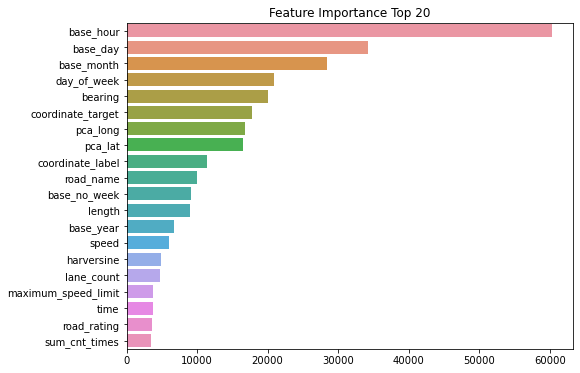

In [9]:
ft_importance_values = lgbm_reg.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

### Make Submission File

In [10]:
sample = pd.read_csv('../data/raw/sample_submission.csv')
sample['target'] = lgbm_reg.predict(X_test)
display(sample)

,id,target
0,TEST_000000,24.504785
1,TEST_000001,43.773541
2,TEST_000002,65.248069
3,TEST_000003,37.743634
4,TEST_000004,44.536591
...,...,...
291236,TEST_291236,47.480208
291237,TEST_291237,51.480622
291238,TEST_291238,23.239317
291239,TEST_291239,23.737282


In [11]:
date = str(pd.Timestamp.now())[:10].replace('-','')
sample.to_csv(f'../data/submission/{date}.csv', index=False)